# Lets Use Convolutional Nueral Networks for Image Classification
## Lets Use Cats Vs Dogs Dataset for this Case Study


### GPU Allocated

In [1]:
!nvidia-smi 

Sat Dec 24 17:00:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import Section

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os 
import cv2
import glob
import pathlib
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
import tensorflow as tf
#!pip install keras-tuner 
import keras_tuner as kt
from tensorflow.keras import utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input,Activation,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler,ReduceLROnPlateau,TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
from keras_preprocessing.image import ImageDataGenerator


## Lets pull the credit card fraud dataset from Kaggle

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir dataset
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip microsoft-catsvsdogs-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PetImages/Dog/550.jpg  
  inflating: dataset/PetImages/Dog/5500.jpg  
  inflating: dataset/PetImages/Dog/5501.jpg  
  inflating: dataset/PetImages/Dog/5502.jpg  
  inflating: dataset/PetImages/Dog/5503.jpg  
  inflating: dataset/PetImages/Dog/5504.jpg  
  inflating: dataset/PetImages/Dog/5505.jpg  
  inflating: dataset/PetImages/Dog/5506.jpg  
  inflating: dataset/PetImages/Dog/5507.jpg  
  inflating: dataset/PetImages/Dog/5508.jpg  
  inflating: dataset/PetImages/Dog/5509.jpg  
  inflating: dataset/PetImages/Dog/551.jpg  
  inflating: dataset/PetImages/Dog/5510.jpg  
  inflating: dataset/PetImages/Dog/5511.jpg  
  inflating: dataset/PetImages/Dog/5512.jpg  
  inflating: dataset/PetImages/Dog/5513.jpg  
  inflating: dataset/PetImages/Dog/5514.jpg  
  inflating: dataset/PetImages/Dog/5515.jpg  
  inflating: dataset/PetImages/Dog/5516.jpg  
  inflating: dataset/PetImages/Dog/5517.jpg  
  inflating: dataset/PetImages/

## Lets Analyse the dataset

In [5]:
data_dir = '/content/dataset/PetImages'
data_dir = pathlib.Path(data_dir)
Dogs=list(data_dir.glob('Dog/*'))
Cats=list(data_dir.glob('Cat/*'))
Dogs = sorted(Dogs)
Cats = sorted(Cats)
print('Number of Cat Images : ',len(Cats))
print('Number of Dog Images : ',len(Dogs))


Number of Cat Images :  12501
Number of Dog Images :  12501


## Lets See Few Images of Cats

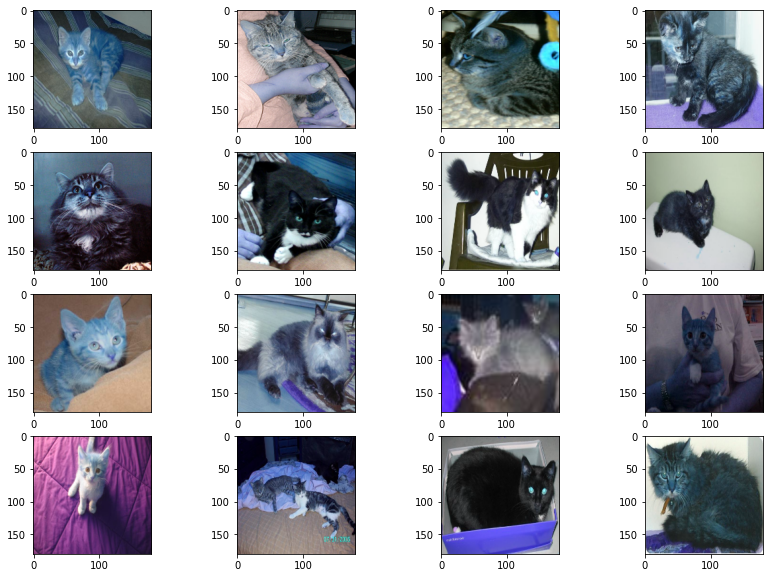

In [ ]:
fig = plt.figure(figsize=(14, 10))
rows = 4
columns = 4
for i in range(16):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('Cat/*'))[i+50]))
  image = cv2.resize(image , (180 , 180))
  plt.imshow(image)
plt.show()

## Lets See Few Images of Dogs

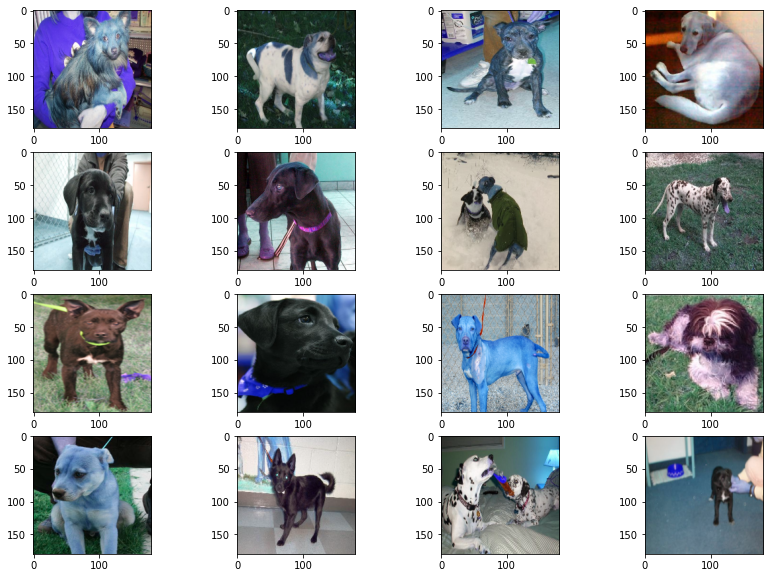

In [ ]:
fig = plt.figure(figsize=(14, 10))
rows = 4
columns = 4
for i in range(16):  
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(str(list(data_dir.glob('Dog/*'))[i+50]))
  image = cv2.resize(image , (180 , 180))
  plt.imshow(image)
plt.show()

## Lets create train and test datasets

In [ ]:
#!mkdir '/content/dataset/train/Cat' '/content/dataset/test/Cat' '/content/dataset/train/Dog' '/content/dataset/test/Dog'

In [ ]:
'''train_catslength = int(len(Cats) - np.round(len(Cats)*0.20))
train_dogslength = int(len(Dogs) - np.round(len(Dogs)*0.20))
# as the size is same fir cats and dogs using same variable
#train cats - delete test 
for cat in tqdm(Cats[train_catslength:]))):
  imagename = str(Cats[cat]).split('/Cat/')[1]
  source = str(Cats[cat])
  if cat <= train_catslength:
    dest = '/content/dataset/train/Cat'
  else:
    dest = '/content/dataset/test/Cat'
  !cp  {source} {dest}

for dog in tqdm(range(len(Dogs))):
  imagename = str(Dogs[dog]).split('/Dog/')[1]
  source = str(Dogs[dog])
  if dog <= train_dogslength:
    dest = '/content/dataset/train/Dog'
  else:
    dest = '/content/dataset/test/Dog'
  !cp  {source} {dest}'''




In [ ]:
#!rm -r '/content/dataset/test' '/content/dataset/train' '/content/dataset/__MACOSX'

In [10]:
#!pip install -U --no-cache-dir gdown --pre

In [11]:
!gdown --id 1TWYWXO36sGWHbD001yMbl1BoprcWGAJb
!unzip  test.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/Dog/10447.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._10447.jpg  
  inflating: /content/dataset/test/Dog/11759.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._11759.jpg  
  inflating: /content/dataset/test/Dog/12250.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._12250.jpg  
  inflating: /content/dataset/test/Dog/12244.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._12244.jpg  
  inflating: /content/dataset/test/Dog/11995.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._11995.jpg  
  inflating: /content/dataset/test/Dog/10453.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._10453.jpg  
  inflating: /content/dataset/test/Dog/10335.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._10335.jpg  
  inflating: /content/dataset/test/Dog/11003.jpg  
  inflating: /content/dataset/__MACOSX/test/Dog/._11003.jpg  
  inflating: /content/dataset/test/Dog/11765.

In [12]:
!gdown --id 1wvuCojpDLJK3wBo2RYw3B30q7CIeFJ-N
!unzip  train.zip -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/Dog/816.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._816.jpg  
  inflating: /content/dataset/train/Dog/8418.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._8418.jpg  
  inflating: /content/dataset/train/Dog/4222.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._4222.jpg  
  inflating: /content/dataset/train/Dog/2653.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._2653.jpg  
  inflating: /content/dataset/train/Dog/1372.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._1372.jpg  
  inflating: /content/dataset/train/Dog/7703.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._7703.jpg  
  inflating: /content/dataset/train/Dog/8430.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._8430.jpg  
  inflating: /content/dataset/train/Dog/3565.jpg  
  inflating: /content/dataset/__MACOSX/train/Dog/._3565.jpg  
  inflating: /content/dataset/train/Dog/5114.jp

In [13]:
!rm /content/dataset/test/Cat/Thumbs.db '/content/dataset/train/Cat/666.jpg' /content/dataset/test/Dog/.DS_Store /content/dataset/test/Cat/.DS_Store  /content/dataset/train/Dog/.DS_Store /content/dataset/train/Cat/.DS_Store /content/dataset/test/.DS_Store /content/dataset/test/Dog/11702.jpg /content/dataset/train/.DS_Store

In [ ]:
'''from PIL import Image
folder_path = '/content/dataset/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])'''
    

In [14]:
data_dir_test = '/content/dataset/train'
data_dir_test = pathlib.Path(data_dir_test)
Dogs_test=list(data_dir_test.glob('Dog/*'))
Cats_test=list(data_dir_test.glob('Cat/*'))
Dogs_test = sorted(Dogs_test)
Cats_test = sorted(Cats_test)
for i in Dogs_test:
  if '.jpg' not in str(i):
    print(i)
for i in Cats_test:
  if '.jpg' not in str(i):
    print(i)
print('Number of Cat Images : ',len(Cats_test))
print('Number of Dog Images : ',len(Dogs_test))

Number of Cat Images :  9999
Number of Dog Images :  10000


## Lets create train and test data generators

In [15]:
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,shear_range=0.2,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/dataset/train',target_size=(150, 150),batch_size=32,class_mode='binary')
test_generator = test_datagen.flow_from_directory('/content/dataset/test',target_size=(150, 150),batch_size=32,class_mode='binary')

Found 19999 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Lets see what image data generator got

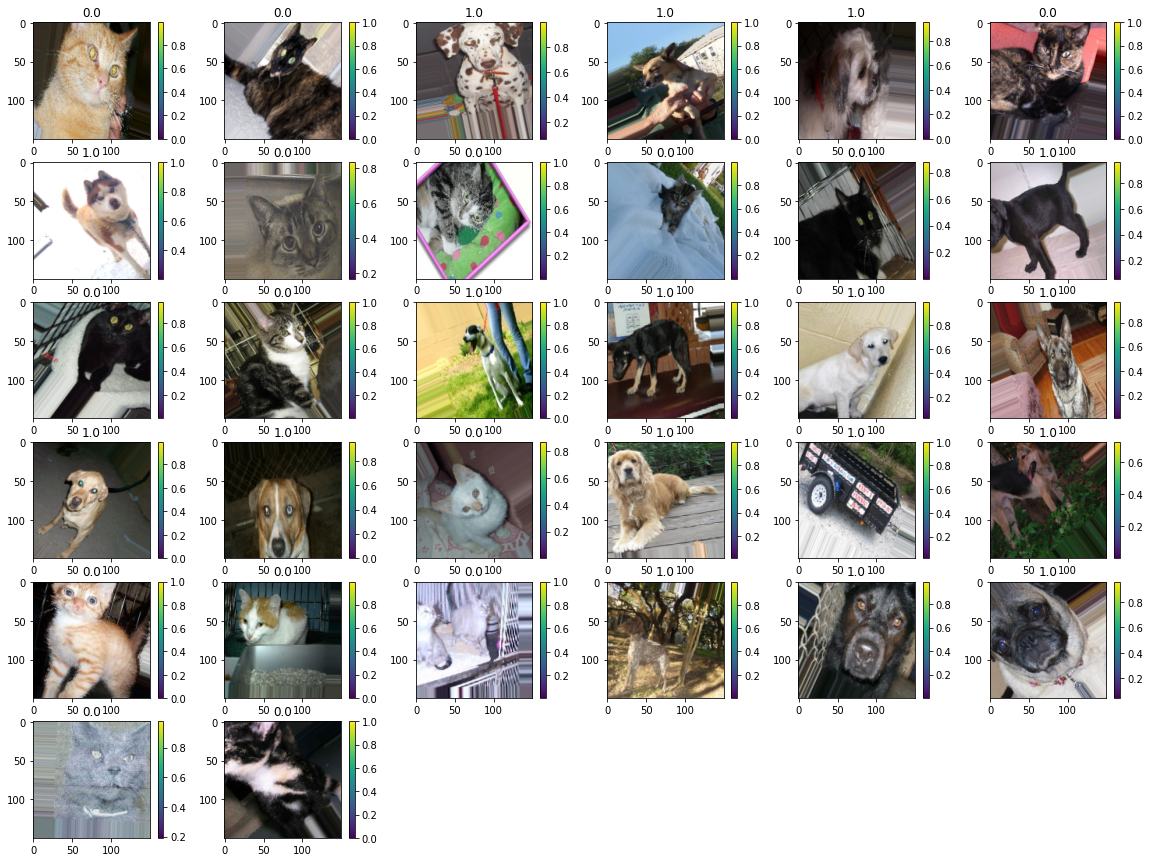

In [ ]:
for batch in train_generator:
  images = batch[0]
  labels = batch[1]
  fig = plt.figure(figsize=(20, 15))
  for i in range(len(images)):  
    fig.add_subplot(6, 6, i+1)
    plt.imshow(images[i])
    plt.colorbar()
    plt.title(labels[i])
  plt.show()
  break


## So Dog : 1.0  and cat: 0.0

Lets Build the model using Keras Tuner


In [16]:
Input_Shape = (150,150,3)
outputshape = 1
epochs = 30
batch_size = 32

In [17]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value = 1, max_value = 4)):
    if counter ==0:
      model.add(
          Conv2D(
              filters=hp.Int('conv_filter'+str(i), min_value=10, max_value=30, step=5),
              kernel_size=hp.Choice('conv_kernel'+str(i), values = [3,5]),
              activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
              kernel_initializer = hp.Choice('initialiser'+str(i),values = ['he_normal','glorot_normal']),
              padding="same",
              input_shape = Input_Shape
          )
          )
      model.add(
      MaxPooling2D(
          pool_size=hp.Choice('maxpooling'+str(i), values = [2,3]),
          padding="same"
          
      )
      )
    else:
      model.add(
          Conv2D(
              filters=hp.Int('conv_filter'+str(i), min_value=10, max_value=30, step=5),
              kernel_size=hp.Choice('conv_kernel'+str(i), values = [3,5]),
              activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
              kernel_initializer = hp.Choice('initialiser'+str(i),values = ['he_normal','glorot_normal']),
              padding="same",
          )
          )
      model.add(
      MaxPooling2D(
          pool_size=hp.Choice('maxpooling'+str(i), values = [2,3]),
          padding="same"
          
      )
      )
    counter += 1
  model.add(Flatten())
  model.add(
            Dense(
                hp.Int('denseunitsoutside', min_value = 100, max_value = 300,step =100),
                activation = hp.Choice('activationoutside',values=['relu','tanh','sigmoid']),
                kernel_initializer = hp.Choice('initialiseroutside',values = ['he_normal','glorot_normal'])
            ) 
            )
  model.add(Dense(outputshape,activation = 'sigmoid'))
  model.compile(optimizer = hp.Choice('optimiser', values = ['rmsprop','sgd','adam']),loss='binary_crossentropy',metrics=['accuracy'])
  return model
  


In [18]:
tuner_random = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5, directory = "hyperparametertuning",project_name = 'BinaryCNNrun5')

In [27]:
tf.compat.v1.reset_default_graph
tf.keras.backend.clear_session()

In [19]:
tuner_random.search(train_generator,epochs = 2,validation_data = test_generator)

Trial 5 Complete [00h 04m 57s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.7692000269889832
Total elapsed time: 00h 25m 54s


In [20]:
tuner_random.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'conv_filter0': 10,
 'conv_kernel0': 3,
 'activation0': 'tanh',
 'initialiser0': 'glorot_normal',
 'maxpooling0': 3,
 'denseunitsoutside': 200,
 'activationoutside': 'tanh',
 'initialiseroutside': 'glorot_normal',
 'optimiser': 'adam',
 'conv_filter1': 10,
 'conv_kernel1': 3,
 'activation1': 'relu',
 'initialiser1': 'glorot_normal',
 'maxpooling1': 3,
 'conv_filter2': 20,
 'conv_kernel2': 5,
 'activation2': 'relu',
 'initialiser2': 'glorot_normal',
 'maxpooling2': 3}

In [21]:
best_model = tuner_random.get_best_models(num_models = 1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 20)        5020      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 20)         0

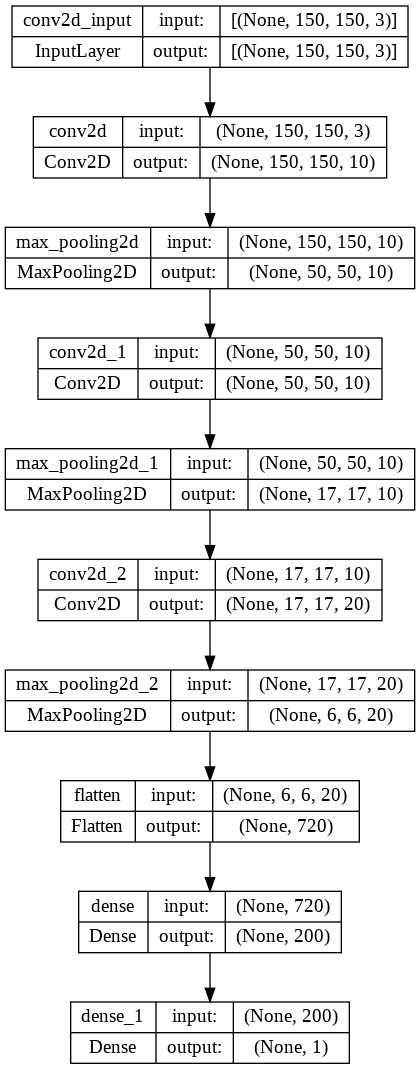

In [22]:
plot_model(best_model, show_shapes=True)

In [23]:
best_model.save('Best_Model')

In [28]:
!zip -r /content/Best_Model.zip /content/Best_Model

updating: content/Best_Model/ (stored 0%)
  adding: content/Best_Model/saved_model.pb (deflated 89%)
  adding: content/Best_Model/variables/ (stored 0%)
  adding: content/Best_Model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/Best_Model/variables/variables.index (deflated 67%)
  adding: content/Best_Model/assets/ (stored 0%)
  adding: content/Best_Model/keras_metadata.pb (deflated 92%)


In [29]:
reconstructed_bestmodel = tf.keras.models.load_model("/content/Best_Model")

In [30]:
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

In [31]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

In [32]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
%reload_ext tensorboard

In [33]:
history_MLP = reconstructed_bestmodel.fit(train_generator, epochs=epochs, verbose=1, validation_data=test_generator,callbacks = [earlystop,checkpoint,tensorboard_callback]) 

Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.7700
Epoch 1: val_accuracy improved from -inf to 0.79460, saving model to model_save/weights-01-0.7946.hdf5
625/625 [==============================] - 150s 239ms/step - loss: 0.4803 - accuracy: 0.7700 - val_loss: 0.4497 - val_accuracy: 0.7946
Epoch 2/30
625/625 [==============================] - ETA: 0s - loss: 0.4436 - accuracy: 0.7928
Epoch 2: val_accuracy improved from 0.79460 to 0.82100, saving model to model_save/weights-02-0.8210.hdf5
625/625 [==============================] - 149s 239ms/step - loss: 0.4436 - accuracy: 0.7928 - val_loss: 0.4012 - val_accuracy: 0.8210
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.4250 - accuracy: 0.8019
Epoch 3: val_accuracy did not improve from 0.82100
625/625 [==============================] - 151s 242ms/step - loss: 0.4250 - accuracy: 0.8019 - val_loss: 0.4003 - val_accuracy: 0.8170
Epoch 4/30
625/625 [===========================

In [34]:
score = best_model.evaluate(test_generator, verbose=1) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

157/157 [==============================] - 14s 90ms/step - loss: 0.4907 - accuracy: 0.7692
Test score: 0.49073368310928345
Test accuracy: 0.7692000269889832


## lets download and create a predict dataset

In [35]:
!mkdir predict
!gdown https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492_960_720.jpg
!cp /content/cat-2083492_960_720.jpg /content/predict

Downloading...
From: https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492_960_720.jpg
To: /content/cat-2083492_960_720.jpg
100% 143k/143k [00:00<00:00, 9.16MB/s]


In [36]:
!gdown https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1

Downloading...
From: https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress
To: /content/kitty-cat-kitten-pet-45201.jpeg?auto=compress
100% 386k/386k [00:00<00:00, 11.5MB/s]


In [37]:
!cp /content/kitty-cat-kitten-pet-45201.jpeg?auto=compress /content/predict

In [38]:
!gdown https://images.pexels.com/photos/1851164/pexels-photo-1851164.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1
!gdown https://images.pexels.com/photos/1805164/pexels-photo-1805164.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1

Downloading...
From: https://images.pexels.com/photos/1851164/pexels-photo-1851164.jpeg?auto=compress
To: /content/pexels-photo-1851164.jpeg?auto=compress
100% 1.34M/1.34M [00:00<00:00, 24.8MB/s]
Downloading...
From: https://images.pexels.com/photos/1805164/pexels-photo-1805164.jpeg?auto=compress
To: /content/pexels-photo-1805164.jpeg?auto=compress
100% 866k/866k [00:00<00:00, 18.9MB/s]


In [39]:
!cp /content/pexels-photo-1805164.jpeg?auto=compress /content/predict
!cp /content/pexels-photo-1851164.jpeg?auto=compress /content/predict

# lets predict the downloaded images

In [40]:
data_dir = '/content/predict/'
data_dir = pathlib.Path(data_dir)
predicts=list(data_dir.glob('*'))
print('Number of predicts Images : ',len(predicts))


Number of predicts Images :  4


So Dog : 1.0 and cat: 0.0

(1, 150, 150, 3)


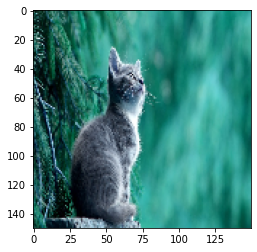

1/1 [==============================] - 0s 166ms/step
[[0.581915]]
(1, 150, 150, 3)


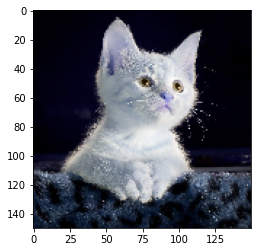

1/1 [==============================] - 0s 16ms/step
[[0.02525579]]
(1, 150, 150, 3)


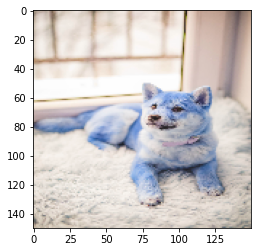

1/1 [==============================] - 0s 15ms/step
[[0.26023433]]
(1, 150, 150, 3)


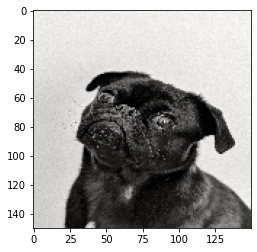

1/1 [==============================] - 0s 16ms/step
[[8.483422e-06]]


In [41]:
for img in predicts:
  image = cv2.imread(str(img))
  image = cv2.resize(image , (150,150))
  print(np.expand_dims(image,axis=0).shape)
  plt.imshow(image)
  plt.show()
  y_pred = best_model.predict(np.expand_dims(image,axis=0)) 
  print(y_pred)